In [2]:
#see plots in Jupyter
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

#make pandas dataframe
filename = "nrg_ind_335a_1_Data.csv"
df = pd.read_csv(filename, encoding = "ISO-8859-1")

#see head (first rows of data frame)
df.head()

,TIME,GEO,UNIT,INDIC_EN,Value,Flag and Footnotes
0,2006,European Union (28 countries),Percentage,Share of renewable energy in gross final energ...,9.5,NaN
1,2006,European Union (28 countries),Percentage,Share of renewable energy in transport,2.5,NaN
2,2006,European Union (28 countries),Percentage,Share of renewable energy in electricity,15.4,NaN
3,2006,European Union (28 countries),Percentage,Share of renewable energy in heating and cooling,11.4,NaN
4,2006,Belgium,Percentage,Share of renewable energy in gross final energ...,2.6,NaN


In [3]:
#get dimensions of data frame (rows, columns)
df.shape

(1400, 6)

In [4]:
#list data type of each column, number of non-missing values, memry usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 6 columns):
TIME                  1400 non-null int64
GEO                   1400 non-null object
UNIT                  1400 non-null object
INDIC_EN              1400 non-null object
Value                 1400 non-null float64
Flag and Footnotes    0 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 65.7+ KB


In [5]:
#see which values in "INDIC_EN" column exist
df.INDIC_EN.unique()

array(['Share of renewable energy in gross final energy consumption',
       'Share of renewable energy in transport',
       'Share of renewable energy in electricity',
       'Share of renewable energy in heating and cooling'], dtype=object)

In [6]:
#see which values in "GEO" column exist
df.GEO.unique()

array(['European Union (28 countries)', 'Belgium', 'Bulgaria',
       'Czech Republic', 'Denmark',
       'Germany (until 1990 former territory of the FRG)', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
       'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
       'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'United Kingdom',
       'Iceland', 'Norway', 'Montenegro',
       'Former Yugoslav Republic of Macedonia, the', 'Albania', 'Turkey'], dtype=object)

In [7]:
#filter dataframe by means of boolean indexing/ boolean selection: european union, gross final
eu_crit1 = df.GEO == "European Union (28 countries)"
eu_crit2 = df.INDIC_EN == "Share of renewable energy in gross final energy consumption"
eu_crit = eu_crit1 & eu_crit2
eu = df.loc[eu_crit]
eu

,TIME,GEO,UNIT,INDIC_EN,Value,Flag and Footnotes
0,2006,European Union (28 countries),Percentage,Share of renewable energy in gross final energ...,9.5,NaN
140,2007,European Union (28 countries),Percentage,Share of renewable energy in gross final energ...,10.4,NaN
280,2008,European Union (28 countries),Percentage,Share of renewable energy in gross final energ...,11.0,NaN
420,2009,European Union (28 countries),Percentage,Share of renewable energy in gross final energ...,12.4,NaN
560,2010,European Union (28 countries),Percentage,Share of renewable energy in gross final energ...,12.9,NaN
700,2011,European Union (28 countries),Percentage,Share of renewable energy in gross final energ...,13.2,NaN
840,2012,European Union (28 countries),Percentage,Share of renewable energy in gross final energ...,14.4,NaN
980,2013,European Union (28 countries),Percentage,Share of renewable energy in gross final energ...,15.2,NaN
1120,2014,European Union (28 countries),Percentage,Share of renewable energy in gross final energ...,16.1,NaN
1260,2015,European Union (28 countries),Percentage,Share of renewable energy in gross final energ...,16.7,NaN


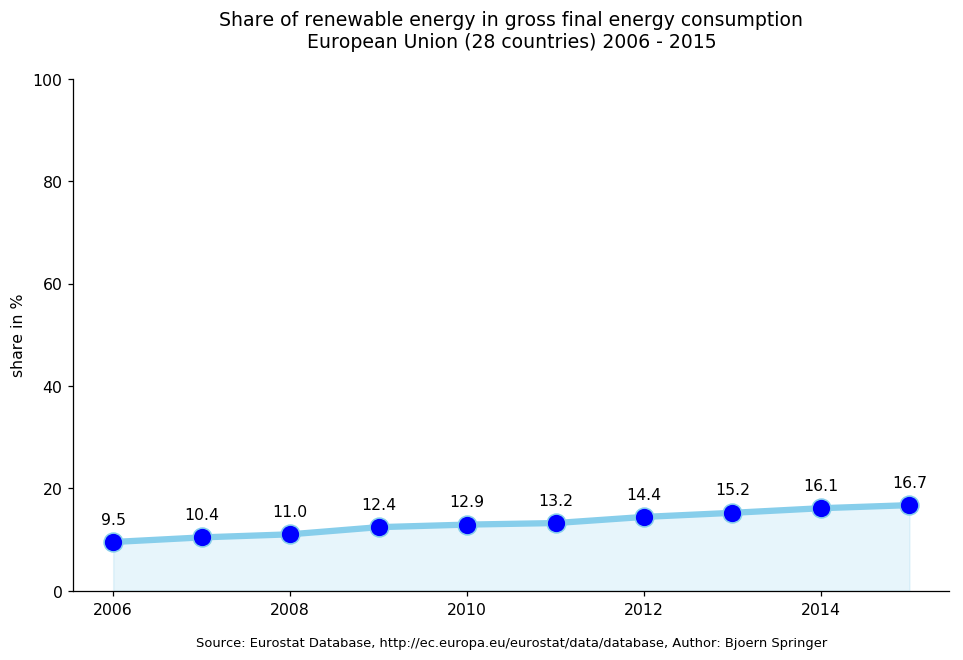

In [11]:
# style, color palette, figure size
my_dpi=113
plt.figure(figsize=(10, 6), dpi=my_dpi)

#make plot
plt.ylim(0, 100)
plt.fill_between("TIME", "Value", data=eu, color="skyblue", alpha=0.2)
plt.plot("TIME", "Value", data=eu, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4) 
sns.despine()

#add values to the coordinates
for index in eu.index:
    time = eu["TIME"].loc[index]
    value = eu["Value"].loc[index]
    plt.text(time, value + 3, str(value), ha='center', va='bottom')

# Add titles, labels, text
plt.title("Share of renewable energy in gross final energy consumption\nEuropean Union (28 countries) 2006 - 2015\n", 
          loc='center', fontsize=12, fontweight=0, color='black')
plt.xlabel("\nSource: Eurostat Database, http://ec.europa.eu/eurostat/data/database, Author: Bjoern Springer", 
           fontsize="small")
plt.ylabel("share in %")

# save as .png with less whitespace around plot
plt.savefig("renewable_energy_01.png", bbox_inches="tight")

In [12]:
#filter dataframe by means of boolean indexing/ boolean selection: single countries, gross final, 2015
countries_crit1 = df.GEO != "European Union (28 countries)"
countries_crit2 = df.INDIC_EN == "Share of renewable energy in gross final energy consumption"
countries_crit3 = df.TIME == 2015
countries_crit = countries_crit1 & countries_crit2 & countries_crit3
countries = df.loc[countries_crit]

#replace long country names, sort by value (descending)
countries = countries.replace('Germany (until 1990 former territory of the FRG)', 'Germany')\
    .replace('Former Yugoslav Republic of Macedonia, the', 'Rep. of Macedonia')\
       .sort_values("Value", ascending=False)

countries

,TIME,GEO,UNIT,INDIC_EN,Value,Flag and Footnotes
1376,2015,Iceland,Percentage,Share of renewable energy in gross final energ...,70.2,NaN
1380,2015,Norway,Percentage,Share of renewable energy in gross final energ...,69.4,NaN
1368,2015,Sweden,Percentage,Share of renewable energy in gross final energ...,53.9,NaN
1384,2015,Montenegro,Percentage,Share of renewable energy in gross final energ...,43.1,NaN
1364,2015,Finland,Percentage,Share of renewable energy in gross final energ...,39.3,NaN
1316,2015,Latvia,Percentage,Share of renewable energy in gross final energ...,37.6,NaN
1392,2015,Albania,Percentage,Share of renewable energy in gross final energ...,34.9,NaN
1340,2015,Austria,Percentage,Share of renewable energy in gross final energ...,33.0,NaN
1276,2015,Denmark,Percentage,Share of renewable energy in gross final energ...,30.8,NaN
1304,2015,Croatia,Percentage,Share of renewable energy in gross final energ...,29.0,NaN


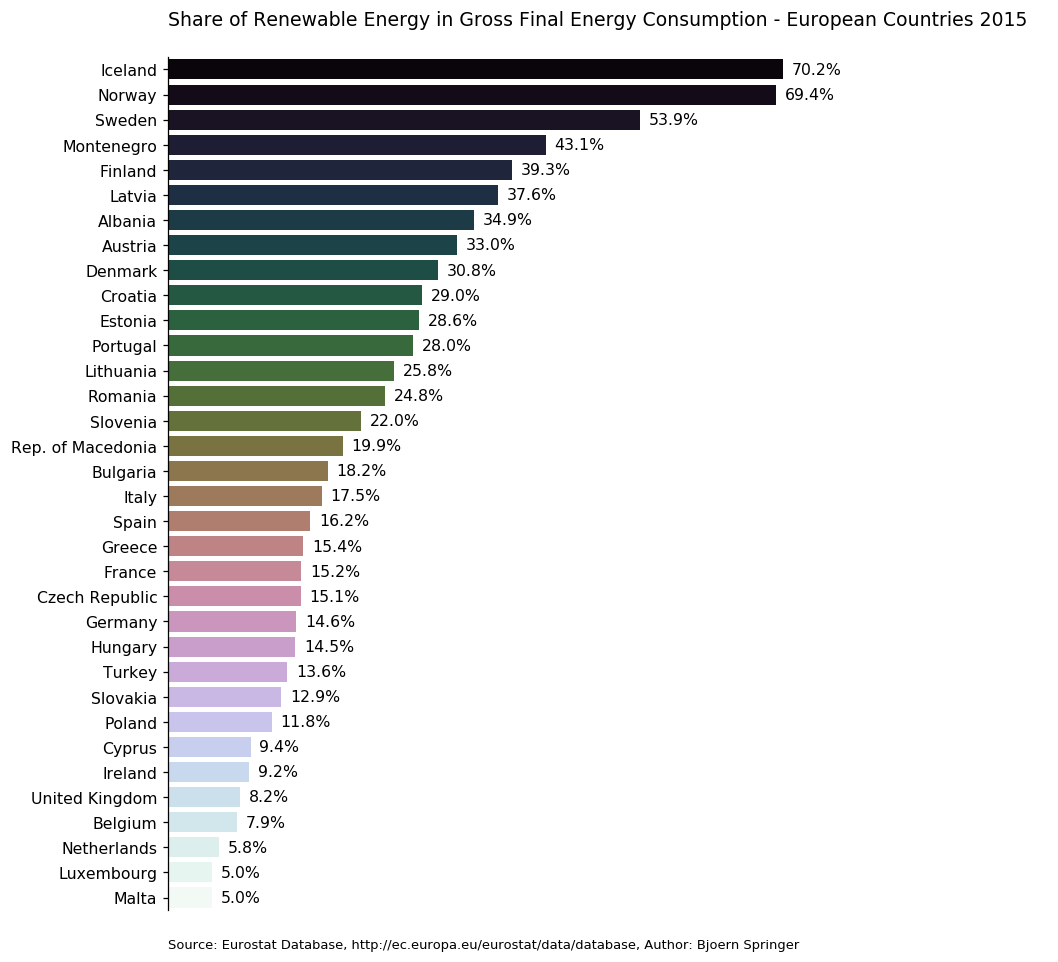

In [15]:
# style, color palette, figure size
my_dpi=113
plt.figure(figsize=(10, 10), dpi=my_dpi)
plt.xlim(0, 100)

#make plot
ax = sns.barplot(y=countries.GEO, x=countries.Value, data = countries, palette="cubehelix")
sns.despine()
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)

#Attach a text label right of each bar displaying its length
rects = ax.patches
for rect in rects:
    width = rect.get_width()
    ax.text(width + 1, rect.get_y() + rect.get_height()/2, str(width) + "%", ha='left', va='center')

# Add titles, labels, text
plt.title("Share of Renewable Energy in Gross Final Energy Consumption - European Countries 2015\n", loc='left', 
	fontsize=12, fontweight=0, color='black')
plt.xlabel("")
plt.ylabel("")
plt.text(0, 35,"\nSource: Eurostat Database, http://ec.europa.eu/eurostat/data/database, Author: Bjoern Springer", 
         fontsize="small")

# save as .png with less whitespace around plot
plt.savefig("renewable_energy_02.png", bbox_inches="tight")